<a href="https://colab.research.google.com/github/dariobublitz/DS/blob/main/AlgoritmoML_MVP_Bublitz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Algortimo SVM

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataset 
permanece= pd.read_csv('/content/drive/MyDrive/colab/Bank_Customer_Churn_Prediction.csv')
permanece.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
permanece.shape

(10000, 12)

In [ ]:
#chequeo de nulos
permanece.isnull().sum()


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Chequeo de variables determinadno cuales son categoricas y cuales numericas

In [ ]:
#chequeo de variables
permanece.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
permanece.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [ ]:
#seleccion de variables categoricas

cat_columns = permanece.select_dtypes(include='object').columns
numeric_columns = permanece.select_dtypes(include=np.number).columns

Vamos a chequear la cantidad de valores diferentes en cada categorica.

In [ ]:
#chequeo de dimensionalidad de variables categoricas
lista = []
#loop por columnas categoricas
for col in cat_columns:
  info = (col, permanece[col].nunique(), permanece[col].unique() )
  lista.append(info)
pd.DataFrame(lista, columns=['feature', 'cantidad', 'valores'])

,feature,cantidad,valores
0,country,3,"[France, Spain, Germany]"
1,gender,2,"[Female, Male]"


## Transformacion de categórica a numérica:
1. OrdinalEncoder
2. One Hot encoder

### Generacion de modelos

1. Imput y targuet
2. Realizamos un split
2. Transformacion de valores de preproceso para train dataset
3. Entrenamiento 
4. Transformacion en base a lo anterior en el test
5. Predicción
6. Métrica



In [ ]:
#chequeo de desbalanceo
permanece.churn.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: churn, dtype: float64

In [ ]:
#1. imput y target

X = permanece.drop(['customer_id','churn'], axis=1)
y = permanece['churn']

#2. split de modelo
from sklearn.model_selection import train_test_split

Xx_train , Xx_test, yy_train, yy_test = train_test_split(X, y , test_size=0.2, random_state=10, stratify=y)

print(Xx_train.shape, yy_train.shape,Xx_test.shape , yy_test.shape)

(8000, 10) (8000,) (2000, 10) (2000,)


In [ ]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [ ]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


In [ ]:
yy_train.head()

4498    0
9654    0
4431    0
7206    0
5214    1
Name: churn, dtype: int64

In [ ]:
yy_test.head()

2495    1
5652    0
4081    0
2152    1
641     0
Name: churn, dtype: int64

# <font color='Yellow'>1.a OrdinalEncoder
<font color='#d776c3'>sklearn.preprocessing 

In [ ]:
cat_columns

Index(['country', 'gender'], dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#generacion del encoder 
le = OrdinalEncoder(handle_unknown='use_encoded_value' , #use cuando tenes valores desconocidos 
                    unknown_value=-1) # asignacion a valores desconocidos 

# generacion de numeros por cada categórico 
le.fit(Xx_train[cat_columns])
X1_train=Xx_train.copy()
#transformacion de las categoricas en train dataset
X1_train[cat_columns] = le.transform(X1_train[cat_columns])
X1_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0.0,1.0,30,2,131406.56,1,1,1,47952.45
9654,834,2.0,1.0,34,5,0.00,2,0,0,53437.10
4431,616,1.0,0.0,42,6,117899.95,2,0,0,150266.81
7206,753,1.0,0.0,47,1,131160.85,1,1,0,197444.69
5214,740,1.0,0.0,57,3,113386.36,2,1,1,65121.63


In [ ]:
# Obtener las categorías asignadas a la variable 'country' y 'gender'
country_categories = le.categories_[0]
gender_categories = le.categories_[1]

# Crear un diccionario que mapea cada categoría a su número correspondiente
country_dict = dict(zip(country_categories, range(len(country_categories))))
gender_dict = dict(zip(gender_categories, range(len(gender_categories))))

# Imprimir los diccionarios resultantes
print(country_dict)
print(gender_dict)


{'France': 0, 'Germany': 1, 'Spain': 2}
{'Female': 0, 'Male': 1}


In [ ]:
#@title #posibles "Arreglo de variables"
import pandas as pd

a = {
  "0": ['France', 'Female '],
  "1": ['Germany', 'Male'],
  "2": ['Spain','NaN']
}

#load data into a DataFrame object:
A = pd.DataFrame(a, index=['country','gender'])
print('A -------------------------------- A')
print(A) 
print('==================================')
b = {
  "0": ['France', 'Male'],
  "1": ['Germany','Female ' ],
  "2": ['Spain','NaN']
}

#load data into a DataFrame object:
B = pd.DataFrame(b, index=['country','gender'])
print('B -------------------------------- B')
print(B) 
print('==================================')
#---------------------------------------------1
c = {
  "0": ['France', 'Female '],
  "1": ['Spain', 'Male'],
  "2": ['Germany','NaN']
}

#load data into a DataFrame object:
C = pd.DataFrame(c, index=['country','gender'])
print('C -------------------------------- C')
print(C) 
print('==================================')
d = {
  "0": ['France', 'Male'],
  "1": ['Spain','Female ' ],
  "2": ['Germany','NaN']
}

#load data into a DataFrame object:
D = pd.DataFrame(d, index=['country','gender'])
print('D -------------------------------- D')
print(D) 
print('==================================')
#---------------------------------------------2
e = {
  "0": ['Germany', 'Female '],
  "1": ['France', 'Male'],
  "2": ['Spain','NaN']
}

#load data into a DataFrame object:
E = pd.DataFrame(e, index=['country','gender'])
print('E -------------------------------- E')
print(E) 
print('==================================')
f = {
  "0": ['Germany', 'Male'],
  "1": ['France','Female ' ],
  "2": ['Spain','NaN']
}

#load data into a DataFrame object:
F= pd.DataFrame(f, index=['country','gender'])
print('F -------------------------------- F')
print(F) 
print('==================================')
#---------------------------------------------3
g = {
  "0": ['Spain', 'Female '],
  "1": ['France', 'Male'],
  "2": ['Germany','NaN']
}

#load data into a DataFrame object:
G = pd.DataFrame(g, index=['country','gender'])
print('G -------------------------------- G')
print(G) 
print('==================================')
h = {
  "0": ['Spain', 'Male'],
  "1": ['France','Female ' ],
  "2": ['Germany','NaN']
}

#load data into a DataFrame object:
H = pd.DataFrame(h, index=['country','gender'])
print('H -------------------------------- H')
print(H) 
print('==================================')
#---------------------------------------------4
i = {
  "0": ['Germany', 'Female '],
  "1": ['Spain', 'Male'],
  "2": ['France','NaN']
}
 
#load data into a DataFrame object:
I = pd.DataFrame(i, index=['country','gender'])
print('I -------------------------------- I')
print(I) 
print('==================================')
j = {
  "0": ['Germany', 'Male'],
  "1": ['Spain','Female ' ],
  "2": ['France','NaN']
}

#load data into a DataFrame object:
J = pd.DataFrame(j, index=['country','gender'])
print('J -------------------------------- J')
print(J) 
print('==================================')
#---------------------------------------------5
k = {
  "0": ['Spain', 'Female '],
  "1": ['Germany', 'Male'],
  "2": ['France','NaN']
}

#load data into a DataFrame object:
K = pd.DataFrame(k, index=['country','gender'])
print('K -------------------------------- K')
print(K) 
print('==================================')
l = {
  "0": ['Spain', 'Male'],
  "1": ['Germany','Female ' ],
  "2": ['France','NaN']
}

#load data into a DataFrame object:
L = pd.DataFrame(l, index=['country','gender'])
print('L -------------------------------- L')
print(L) 
print('==================================')
#---------------------------------------------

A -------------------------------- A
               0        1      2
country   France  Germany  Spain
gender   Female      Male    NaN
B -------------------------------- B
              0        1      2
country  France  Germany  Spain
gender     Male  Female     NaN
C -------------------------------- C
               0      1        2
country   France  Spain  Germany
gender   Female    Male      NaN
D -------------------------------- D
              0        1        2
country  France    Spain  Germany
gender     Male  Female       NaN
E -------------------------------- E
               0       1      2
country  Germany  France  Spain
gender   Female     Male    NaN
F -------------------------------- F
               0        1      2
country  Germany   France  Spain
gender      Male  Female     NaN
G -------------------------------- G
               0       1        2
country    Spain  France  Germany
gender   Female     Male      NaN
H -------------------------------- H
           

In [ ]:
X1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4498 to 3138
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      8000 non-null   int64  
 1   country           8000 non-null   float64
 2   gender            8000 non-null   float64
 3   age               8000 non-null   int64  
 4   tenure            8000 non-null   int64  
 5   balance           8000 non-null   float64
 6   products_number   8000 non-null   int64  
 7   credit_card       8000 non-null   int64  
 8   active_member     8000 non-null   int64  
 9   estimated_salary  8000 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 687.5 KB


#Entrenamiento del modelo SVM 1.a

In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X1_train, yy_train)

SVC(kernel='linear')

`get_feature_names_out`

In [ ]:
#country_encoded = pd.DataFrame(ohe.transform(permanece[['country']]).toarray(), columns=ohe.get_feature_names_out(['country']))


In [ ]:
X1_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0.0,1.0,30,2,131406.56,1,1,1,47952.45
9654,834,2.0,1.0,34,5,0.00,2,0,0,53437.10
4431,616,1.0,0.0,42,6,117899.95,2,0,0,150266.81
7206,753,1.0,0.0,47,1,131160.85,1,1,0,197444.69
5214,740,1.0,0.0,57,3,113386.36,2,1,1,65121.63


In [ ]:
#trasnfomracion test
X1_test=Xx_test.copy()
X1_test[cat_columns] = le.transform(X1_test[cat_columns])

In [ ]:
X1_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1.0,0.0,56,2,111920.13,3,1,0,197634.11
5652,691,0.0,0.0,29,9,0.00,2,0,0,199635.93
4081,721,2.0,1.0,33,5,0.00,2,0,1,117626.90
2152,745,0.0,0.0,55,9,110123.59,1,0,1,51548.14
641,706,0.0,0.0,29,5,112564.62,1,1,0,42334.38


In [ ]:
pred1 = classifier.predict(X1_test)

testing1 = pd.DataFrame({'y_true':yy_test, 'pred1':pred1})
#metrica

In [ ]:
testing1

,y_true,pred1
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM)

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testing1['y_true'], testing1['pred1']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.26      0.05      0.09       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:
f1_score(testing1['y_true'], testing1['pred1'])

0.08624229979466119

La métrica F1-score es una medida de la precisión y la exhaustividad (recall) en la clasificación. Se puede observar que la precisión y la exhaustividad para la clase 1 son relativamente bajas, con 0.26 y 0.05, respectivamente. Como resultado, el F1-score para la clase 1 también es bajo, en 0.0862.

El F1-score es especialmente útil cuando las clases están desequilibradas, como en este caso. La clase 0 tiene 1593 muestras, mientras que la clase 1 tiene solo 407.(manteniendo la proporción original) El modelo tiene un buen rendimiento en la clasificación de la clase 0, con un F1-score de 0.87, pero no es tan efectivo en la clasificación de la clase 1.

El F1-score promedio ponderado (weighted avg) es de 0.71, lo que indica que el modelo tiene un rendimiento moderado en general, pero es mucho mejor en la clasificación de la clase 0 en comparación con la clase 1.

# <font color='Yellow'>1.b OrdinalEncoder
<font color='#d776c3'>category_encoders

# <font color='yellow'> A

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.0 MB/s eta 0:00:00


In [ ]:
f1_sc=[]
#f1_sc.append(elmnt)

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderA = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'France': 0, 
                                                        'Germany': 1, 
                                                        'Spain': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderA.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainA_encoded = encoderA.transform(Xx_train)
X_testA_encoded = encoderA.transform(Xx_test)

In [ ]:
X_trainA_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0,1,30,2,131406.56,1,1,1,47952.45
9654,834,2,1,34,5,0.00,2,0,0,53437.10
4431,616,1,0,42,6,117899.95,2,0,0,150266.81
7206,753,1,0,47,1,131160.85,1,1,0,197444.69
5214,740,1,0,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testA_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1,0,56,2,111920.13,3,1,0,197634.11
5652,691,0,0,29,9,0.00,2,0,0,199635.93
4081,721,2,1,33,5,0.00,2,0,1,117626.90
2152,745,0,0,55,9,110123.59,1,0,1,51548.14
641,706,0,0,29,5,112564.62,1,1,0,42334.38


Las variables originales<font color='yellow'> NO FUERON TOCADAS

In [ ]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [ ]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


#Entrenamiento del modelo (SVM) <font color='yellow'> A

In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainA_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predA = classifier.predict(X_testA_encoded)

testingA = pd.DataFrame({'y_true':yy_test, 'predA':predA})
#metrica

In [ ]:
testingA

,y_true,predA
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> A

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingA['y_true'], testingA['predA']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.26      0.05      0.09       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:
f1_scA=f1_score(testingA['y_true'], testingA['predA'])
f1_sc.append(f1_scA)
f1_scA

0.08624229979466119

# <font color='yellow'> B

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderB = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'France': 0, 
                                                        'Germany': 1, 
                                                        'Spain': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderB.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainB_encoded = encoderB.transform(Xx_train)
X_testB_encoded = encoderB.transform(Xx_test)

In [ ]:
X_trainB_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0,0,30,2,131406.56,1,1,1,47952.45
9654,834,2,0,34,5,0.00,2,0,0,53437.10
4431,616,1,1,42,6,117899.95,2,0,0,150266.81
7206,753,1,1,47,1,131160.85,1,1,0,197444.69
5214,740,1,1,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testB_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1,1,56,2,111920.13,3,1,0,197634.11
5652,691,0,1,29,9,0.00,2,0,0,199635.93
4081,721,2,0,33,5,0.00,2,0,1,117626.90
2152,745,0,1,55,9,110123.59,1,0,1,51548.14
641,706,0,1,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainB_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predB = classifier.predict(X_testB_encoded)

testingB = pd.DataFrame({'y_true':yy_test, 'predB':predB})
#metrica

In [ ]:
testingB

,y_true,predB
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> B

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingB['y_true'], testingB['predB']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:
f1_scB=f1_score(testingB['y_true'], testingB['predB'])
f1_sc.append(f1_scB)
f1_scB

0.08264462809917354

# <font color='yellow'> C

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderC = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'France': 0, 
                                                        'Spain': 1, 
                                                        'Germany': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderC.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainC_encoded = encoderC.transform(Xx_train)
X_testC_encoded = encoderC.transform(Xx_test)

In [ ]:
X_trainC_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0,1,30,2,131406.56,1,1,1,47952.45
9654,834,1,1,34,5,0.00,2,0,0,53437.10
4431,616,2,0,42,6,117899.95,2,0,0,150266.81
7206,753,2,0,47,1,131160.85,1,1,0,197444.69
5214,740,2,0,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testC_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,2,0,56,2,111920.13,3,1,0,197634.11
5652,691,0,0,29,9,0.00,2,0,0,199635.93
4081,721,1,1,33,5,0.00,2,0,1,117626.90
2152,745,0,0,55,9,110123.59,1,0,1,51548.14
641,706,0,0,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainC_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predC = classifier.predict(X_testC_encoded)

testingC = pd.DataFrame({'y_true':yy_test, 'predC':predC})
#metrica

In [ ]:
testingC

,y_true,predC
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> C

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingC['y_true'], testingC['predC']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:
f1_scC=f1_score(testingC['y_true'], testingC['predC'])
f1_sc.append(f1_scC)
f1_scC

0.07916666666666666

# <font color='yellow'> D

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder


# instanciar el encoder ordinal
encoderD = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'France': 0, 
                                                        'Spain': 1, 
                                                        'Germany': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderD.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainD_encoded = encoderD.transform(Xx_train)
X_testD_encoded = encoderD.transform(Xx_test)

In [ ]:
X_trainD_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,0,0,30,2,131406.56,1,1,1,47952.45
9654,834,1,0,34,5,0.00,2,0,0,53437.10
4431,616,2,1,42,6,117899.95,2,0,0,150266.81
7206,753,2,1,47,1,131160.85,1,1,0,197444.69
5214,740,2,1,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testD_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,2,1,56,2,111920.13,3,1,0,197634.11
5652,691,0,1,29,9,0.00,2,0,0,199635.93
4081,721,1,0,33,5,0.00,2,0,1,117626.90
2152,745,0,1,55,9,110123.59,1,0,1,51548.14
641,706,0,1,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainD_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predD = classifier.predict(X_testD_encoded)

testingD = pd.DataFrame({'y_true':yy_test, 'predD':predD})
#metrica

In [ ]:
testingD

,y_true,predD
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> D

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingD['y_true'], testingD['predD']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.27      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:

f1_scD=f1_score(testingD['y_true'], testingD['predD'])
f1_sc.append(f1_scD)
f1_scD

0.08316008316008315

# <font color='yellow'> E

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderE = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Germany': 0, 
                                                        'France': 1, 
                                                        'Spain': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderE.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainE_encoded = encoderE.transform(Xx_train)
X_testE_encoded = encoderE.transform(Xx_test)

In [ ]:
X_trainE_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,1,1,30,2,131406.56,1,1,1,47952.45
9654,834,2,1,34,5,0.00,2,0,0,53437.10
4431,616,0,0,42,6,117899.95,2,0,0,150266.81
7206,753,0,0,47,1,131160.85,1,1,0,197444.69
5214,740,0,0,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testE_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,0,0,56,2,111920.13,3,1,0,197634.11
5652,691,1,0,29,9,0.00,2,0,0,199635.93
4081,721,2,1,33,5,0.00,2,0,1,117626.90
2152,745,1,0,55,9,110123.59,1,0,1,51548.14
641,706,1,0,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainE_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predE = classifier.predict(X_testE_encoded)

testingE = pd.DataFrame({'y_true':yy_test, 'predE':predE})
#metrica

In [ ]:
testingE

,y_true,predE
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> E

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingE['y_true'], testingE['predE']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.25      0.04      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.47      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:

f1_scE=f1_score(testingE['y_true'], testingE['predE'])
f1_sc.append(f1_scE)
f1_scE

0.07531380753138076

# <font color='yellow'> F

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderF = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Germany': 0, 
                                                        'France': 1, 
                                                        'Spain': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderF.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainF_encoded = encoderF.transform(Xx_train)
X_testF_encoded = encoderF.transform(Xx_test)

In [ ]:
X_trainF_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,1,0,30,2,131406.56,1,1,1,47952.45
9654,834,2,0,34,5,0.00,2,0,0,53437.10
4431,616,0,1,42,6,117899.95,2,0,0,150266.81
7206,753,0,1,47,1,131160.85,1,1,0,197444.69
5214,740,0,1,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testF_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,0,1,56,2,111920.13,3,1,0,197634.11
5652,691,1,1,29,9,0.00,2,0,0,199635.93
4081,721,2,0,33,5,0.00,2,0,1,117626.90
2152,745,1,1,55,9,110123.59,1,0,1,51548.14
641,706,1,1,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainF_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predF = classifier.predict(X_testF_encoded)

testingF = pd.DataFrame({'y_true':yy_test, 'predF':predF})
#metrica

In [ ]:
testingF

,y_true,predF
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> F

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingF['y_true'], testingF['predF']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:

f1_scF=f1_score(testingF['y_true'], testingF['predF'])
f1_sc.append(f1_scF)
f1_scF

0.07900207900207899

# <font color='yellow'> G

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderG = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Spain': 0, 
                                                        'France': 1, 
                                                        'Germany': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderG.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainG_encoded = encoderG.transform(Xx_train)
X_testG_encoded = encoderG.transform(Xx_test)

In [ ]:
X_trainG_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,1,1,30,2,131406.56,1,1,1,47952.45
9654,834,0,1,34,5,0.00,2,0,0,53437.10
4431,616,2,0,42,6,117899.95,2,0,0,150266.81
7206,753,2,0,47,1,131160.85,1,1,0,197444.69
5214,740,2,0,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testG_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,2,0,56,2,111920.13,3,1,0,197634.11
5652,691,1,0,29,9,0.00,2,0,0,199635.93
4081,721,0,1,33,5,0.00,2,0,1,117626.90
2152,745,1,0,55,9,110123.59,1,0,1,51548.14
641,706,1,0,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainG_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predG = classifier.predict(X_testG_encoded)

testingG = pd.DataFrame({'y_true':yy_test, 'predG':predG})
#metrica

In [ ]:
testingG

,y_true,predG
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> G

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingG['y_true'], testingG['predG']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.04      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:

f1_scG=f1_score(testingG['y_true'], testingG['predG'])
f1_sc.append(f1_scG)
f1_scG

0.07547169811320756

# <font color='yellow'> H

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderH = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Spain': 0, 
                                                        'France': 1, 
                                                        'Germany': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderH.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainH_encoded = encoderH.transform(Xx_train)
X_testH_encoded = encoderH.transform(Xx_test)

In [ ]:
X_trainH_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,1,0,30,2,131406.56,1,1,1,47952.45
9654,834,0,0,34,5,0.00,2,0,0,53437.10
4431,616,2,1,42,6,117899.95,2,0,0,150266.81
7206,753,2,1,47,1,131160.85,1,1,0,197444.69
5214,740,2,1,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testH_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,2,1,56,2,111920.13,3,1,0,197634.11
5652,691,1,1,29,9,0.00,2,0,0,199635.93
4081,721,0,0,33,5,0.00,2,0,1,117626.90
2152,745,1,1,55,9,110123.59,1,0,1,51548.14
641,706,1,1,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainB_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predH = classifier.predict(X_testH_encoded)

testingH = pd.DataFrame({'y_true':yy_test, 'predH':predH})
#metrica

In [ ]:
testingH

,y_true,predH
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM)  <font color='yellow'> H

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingH['y_true'], testingH['predH']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:

f1_scH=f1_score(testingH['y_true'], testingH['predH'])
f1_sc.append(f1_scH)
f1_scH

0.08281573498964802

# <font color='yellow'> I

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderI = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Germany': 0, 
                                                        'Spain': 1, 
                                                        'France': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderI.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainI_encoded = encoderI.transform(Xx_train)
X_testI_encoded = encoderI.transform(Xx_test)

In [ ]:
X_trainI_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,2,1,30,2,131406.56,1,1,1,47952.45
9654,834,1,1,34,5,0.00,2,0,0,53437.10
4431,616,0,0,42,6,117899.95,2,0,0,150266.81
7206,753,0,0,47,1,131160.85,1,1,0,197444.69
5214,740,0,0,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testI_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,0,0,56,2,111920.13,3,1,0,197634.11
5652,691,2,0,29,9,0.00,2,0,0,199635.93
4081,721,1,1,33,5,0.00,2,0,1,117626.90
2152,745,2,0,55,9,110123.59,1,0,1,51548.14
641,706,2,0,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainI_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predI = classifier.predict(X_testI_encoded)

testingI = pd.DataFrame({'y_true':yy_test, 'predI':predI})
#metrica

In [ ]:
testingI

,y_true,predI
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> I

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingI['y_true'], testingI['predI']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.27      0.05      0.09       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:

f1_scI=f1_score(testingI['y_true'], testingI['predI'])
f1_sc.append(f1_scI)
f1_scI

0.08641975308641975

# <font color='yellow'> J

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderJ = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Germany': 0, 
                                                        'Spain': 1, 
                                                        'France': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderJ.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainJ_encoded = encoderJ.transform(Xx_train)
X_testJ_encoded = encoderJ.transform(Xx_test)

In [ ]:
X_trainJ_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,2,0,30,2,131406.56,1,1,1,47952.45
9654,834,1,0,34,5,0.00,2,0,0,53437.10
4431,616,0,1,42,6,117899.95,2,0,0,150266.81
7206,753,0,1,47,1,131160.85,1,1,0,197444.69
5214,740,0,1,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testJ_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,0,1,56,2,111920.13,3,1,0,197634.11
5652,691,2,1,29,9,0.00,2,0,0,199635.93
4081,721,1,0,33,5,0.00,2,0,1,117626.90
2152,745,2,1,55,9,110123.59,1,0,1,51548.14
641,706,2,1,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainJ_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predJ = classifier.predict(X_testJ_encoded)

testingJ = pd.DataFrame({'y_true':yy_test, 'predJ':predJ})
#metrica

In [ ]:
testingJ

,y_true,predJ
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> J

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingJ['y_true'], testingJ['predJ']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.04      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:

f1_scJ=f1_score(testingJ['y_true'], testingJ['predJ'])
f1_sc.append(f1_scJ)
f1_scJ

0.07547169811320756

# <font color='yellow'> K

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderK = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Spain': 0, 
                                                        'Germany': 1, 
                                                        'France': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Female': 0, 
                                                        'Male': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderK.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainK_encoded = encoderK.transform(Xx_train)
X_testK_encoded = encoderK.transform(Xx_test)

In [ ]:
X_trainK_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,2,1,30,2,131406.56,1,1,1,47952.45
9654,834,0,1,34,5,0.00,2,0,0,53437.10
4431,616,1,0,42,6,117899.95,2,0,0,150266.81
7206,753,1,0,47,1,131160.85,1,1,0,197444.69
5214,740,1,0,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testK_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1,0,56,2,111920.13,3,1,0,197634.11
5652,691,2,0,29,9,0.00,2,0,0,199635.93
4081,721,0,1,33,5,0.00,2,0,1,117626.90
2152,745,2,0,55,9,110123.59,1,0,1,51548.14
641,706,2,0,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainK_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predK = classifier.predict(X_testK_encoded)

testingK = pd.DataFrame({'y_true':yy_test, 'predK':predK})
#metrica

In [ ]:
testingK

,y_true,predK
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> K

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingK['y_true'], testingK['predK']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1593
           1       0.27      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:

f1_scK=f1_score(testingK['y_true'], testingK['predK'])
f1_sc.append(f1_scK)
f1_scK

0.0794979079497908

# <font color='yellow'> L

In [ ]:
import category_encoders 
# importar el encoder ordinal de la librería category_encoders
from category_encoders import OrdinalEncoder

# instanciar el encoder ordinal
encoderL = OrdinalEncoder(cols=['country', 'gender'], 
                          mapping=[{'col': 'country', 
                                            'mapping': {'Spain': 0, 
                                                        'Germany': 1, 
                                                        'France': 2}},
                                           {'col': 'gender', 
                                            'mapping': {'Male': 0, 
                                                        'Female': 1}}])

# ajustar el encoder ordinal con el conjunto de entrenamiento
encoderL.fit(Xx_train)

# transformar las variables categóricas del conjunto de entrenamiento y prueba
X_trainL_encoded = encoderL.transform(Xx_train)
X_testL_encoded = encoderL.transform(Xx_test)

In [ ]:
X_trainL_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,2,0,30,2,131406.56,1,1,1,47952.45
9654,834,0,0,34,5,0.00,2,0,0,53437.10
4431,616,1,1,42,6,117899.95,2,0,0,150266.81
7206,753,1,1,47,1,131160.85,1,1,0,197444.69
5214,740,1,1,57,3,113386.36,2,1,1,65121.63


In [ ]:
X_testL_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,1,1,56,2,111920.13,3,1,0,197634.11
5652,691,2,1,29,9,0.00,2,0,0,199635.93
4081,721,0,0,33,5,0.00,2,0,1,117626.90
2152,745,2,1,55,9,110123.59,1,0,1,51548.14
641,706,2,1,29,5,112564.62,1,1,0,42334.38


In [ ]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_trainL_encoded, yy_train)

SVC(kernel='linear')

In [ ]:
predL = classifier.predict(X_testL_encoded)

testingL = pd.DataFrame({'y_true':yy_test, 'predL':predL})
#metrica

In [ ]:
testingL

,y_true,predL
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> L

Evaluacion final del modelo en el test



In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testingL['y_true'], testingL['predL']))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87      1593
           1       0.26      0.05      0.08       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [ ]:

f1_scL=f1_score(testingL['y_true'], testingL['predL'])
f1_sc.append(f1_scL)
f1_scL

0.07933194154488517

In [ ]:
print(len(f1_sc))

13


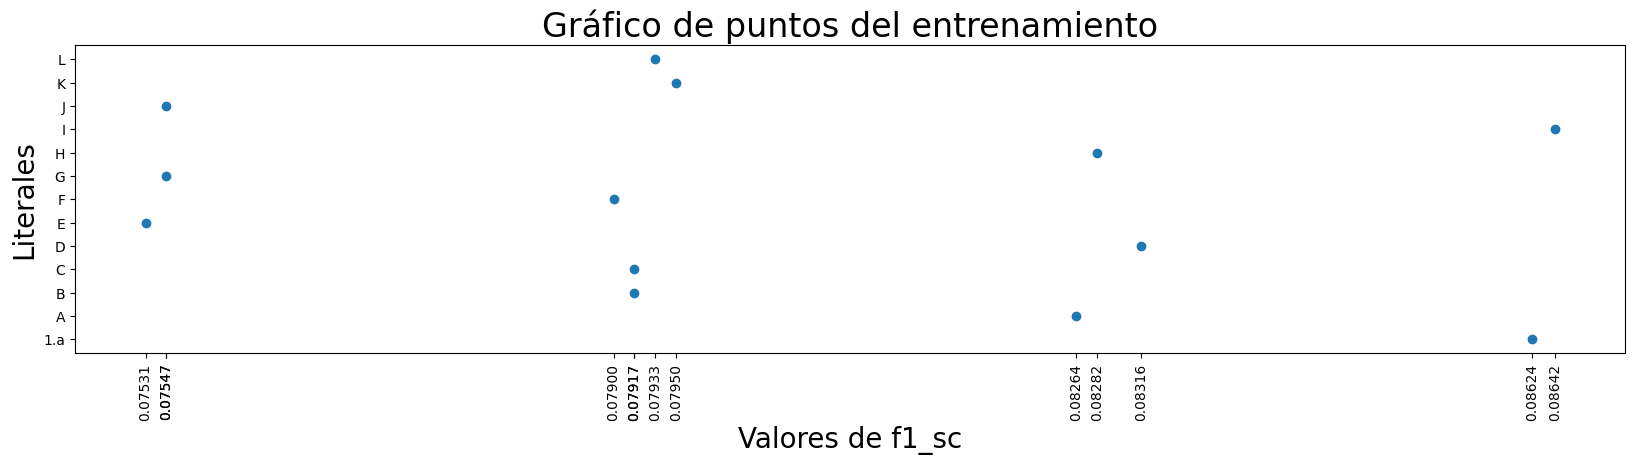

In [ ]:
import matplotlib.pyplot as plt

# Definimos los datos de la lista f1_sc
x_vals = ['1.a','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

# Creamos la figura con un tamaño de 20x10
plt.figure(figsize=(20, 4))

# Creamos el gráfico de puntos con los valores de los ejes invertidos
plt.scatter(f1_sc, x_vals)

# Configuramos los ejes y el título
plt.xlabel('Valores de f1_sc',fontsize=20)
plt.ylabel('Literales',fontsize=20)
plt.title('Gráfico de puntos del entrenamiento', fontsize=24)

# Configuramos las etiquetas del eje y
# Configuramos las etiquetas del eje y y rotamos las del eje x
plt.xticks(rotation=90)

plt.xticks(f1_sc)

# Mostramos el gráfico
plt.show()


In [ ]:
Xx_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,France,Male,30,2,131406.56,1,1,1,47952.45
9654,834,Spain,Male,34,5,0.00,2,0,0,53437.10
4431,616,Germany,Female,42,6,117899.95,2,0,0,150266.81
7206,753,Germany,Female,47,1,131160.85,1,1,0,197444.69
5214,740,Germany,Female,57,3,113386.36,2,1,1,65121.63


In [ ]:
Xx_test.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2495,466,Germany,Female,56,2,111920.13,3,1,0,197634.11
5652,691,France,Female,29,9,0.00,2,0,0,199635.93
4081,721,Spain,Male,33,5,0.00,2,0,1,117626.90
2152,745,France,Female,55,9,110123.59,1,0,1,51548.14
641,706,France,Female,29,5,112564.62,1,1,0,42334.38


In [ ]:
yy_train.head()

4498    0
9654    0
4431    0
7206    0
5214    1
Name: churn, dtype: int64

In [ ]:
yy_test.head()

2495    1
5652    0
4081    0
2152    1
641     0
Name: churn, dtype: int64

In [ ]:
Xx_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4498 to 3138
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      8000 non-null   int64  
 1   country           8000 non-null   object 
 2   gender            8000 non-null   object 
 3   age               8000 non-null   int64  
 4   tenure            8000 non-null   int64  
 5   balance           8000 non-null   float64
 6   products_number   8000 non-null   int64  
 7   credit_card       8000 non-null   int64  
 8   active_member     8000 non-null   int64  
 9   estimated_salary  8000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 687.5+ KB


In [ ]:
numeric_columns , type(numeric_columns )

(Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
        'products_number', 'credit_card', 'active_member', 'estimated_salary',
        'churn'],
       dtype='object'),
 pandas.core.indexes.base.Index)

In [ ]:
num_col=[ 'credit_score', 'age', 'tenure', 'balance',
        'products_number', 'credit_card', 'active_member', 'estimated_salary']
cat_col=['country','gender']        


# <font color='yellow'>OneHotEncoder

In [205]:

# Importar el OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

Xx_train_ohe=Xx_train.copy()
Xx_test_ohe=Xx_test.copy()
# Generar el encoder
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(Xx_train_ohe[['country','gender'] ])

Xx_train_ohe = ohe.transform(Xx_train_ohe[['country','gender'] ])
Xx_test_ohe = ohe.transform(Xx_test_ohe[['country','gender'] ])
# Ajustar el encoder en el conjunto de entrenamiento

ohe.get_feature_names_out()
#Create a Pandas DataFrame of the hot encoded column
Xx_train_ohe = pd.DataFrame(Xx_train_ohe, columns=ohe.get_feature_names_out())
Xx_test_ohe = pd.DataFrame(Xx_test_ohe, columns=ohe.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Train

In [206]:
Xx_train_ohe.head()

,country_Germany,country_Spain,gender_Male
0,0.0,0.0,1.0
1,0.0,1.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [207]:
Xx_train[num_col].head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4498,570,30,2,131406.56,1,1,1,47952.45
9654,834,34,5,0.00,2,0,0,53437.10
4431,616,42,6,117899.95,2,0,0,150266.81
7206,753,47,1,131160.85,1,1,0,197444.69
5214,740,57,3,113386.36,2,1,1,65121.63


In [209]:
# Establecer el índice del DataFrame train
Xx_train = Xx_train.set_index(Xx_train.index, drop=False)
# Establecer el índice del segundo DataFrame
Xx_train_ohe = Xx_train_ohe.set_index(Xx_train.index)

In [210]:
Xx_train_ohe.head()

,country_Germany,country_Spain,gender_Male
4498,0.0,0.0,1.0
9654,0.0,1.0,1.0
4431,1.0,0.0,0.0
7206,1.0,0.0,0.0
5214,1.0,0.0,0.0


In [211]:
# Concatenar las variables numéricas y categóricas transformadas en un solo DataFrame
X_train_encoded = pd.concat([Xx_train[num_col], Xx_train_ohe], axis=1)

In [224]:
Xx_train[num_col].shape, Xx_train_ohe.shape, X_train_encoded.shape

((8000, 8), (8000, 3), (8000, 11))

In [213]:
X_train_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
4498,570,30,2,131406.56,1,1,1,47952.45,0.0,0.0,1.0
9654,834,34,5,0.00,2,0,0,53437.10,0.0,1.0,1.0
4431,616,42,6,117899.95,2,0,0,150266.81,1.0,0.0,0.0
7206,753,47,1,131160.85,1,1,0,197444.69,1.0,0.0,0.0
5214,740,57,3,113386.36,2,1,1,65121.63,1.0,0.0,0.0


## Test

In [ ]:
Xx_test_ohe.head()

,country_Germany,country_Spain,gender_Male
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,1.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [ ]:
X_test_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
2495,466.0,56.0,2.0,111920.13,3.0,1.0,0.0,197634.11,NaN,NaN,NaN,NaN,NaN
5652,691.0,29.0,9.0,0.00,2.0,0.0,0.0,199635.93,NaN,NaN,NaN,NaN,NaN
4081,721.0,33.0,5.0,0.00,2.0,0.0,1.0,117626.90,NaN,NaN,NaN,NaN,NaN
2152,745.0,55.0,9.0,110123.59,1.0,0.0,1.0,51548.14,NaN,NaN,NaN,NaN,NaN
641,706.0,29.0,5.0,112564.62,1.0,1.0,0.0,42334.38,0.0,0.0,1.0,0.0,1.0


In [215]:
# Establecer el índice del DataFrame train
Xx_test = Xx_test.set_index(Xx_test.index, drop=False)
# Establecer el índice del segundo DataFrame
Xx_test_ohe = Xx_test_ohe.set_index(Xx_test.index)

In [216]:
Xx_test_ohe.head()

,country_Germany,country_Spain,gender_Male
2495,1.0,0.0,0.0
5652,0.0,0.0,0.0
4081,0.0,1.0,1.0
2152,0.0,0.0,0.0
641,0.0,0.0,0.0


In [218]:
# Concatenar las variables numéricas y categóricas transformadas en un solo DataFrame
X_test_encoded = pd.concat([Xx_test[num_col], Xx_test_ohe], axis=1)

In [220]:
X_test_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2495,466,56,2,111920.13,3,1,0,197634.11,1.0,0.0,0.0
5652,691,29,9,0.00,2,0,0,199635.93,0.0,0.0,0.0
4081,721,33,5,0.00,2,0,1,117626.90,0.0,1.0,1.0
2152,745,55,9,110123.59,1,0,1,51548.14,0.0,0.0,0.0
641,706,29,5,112564.62,1,1,0,42334.38,0.0,0.0,0.0


In [223]:
Xx_test[num_col].shape,Xx_test_ohe.shape,X_test_encoded.shape

((2000, 8), (2000, 3), (2000, 11))

In [222]:
X_train_encoded.isnull().sum(),X_test_encoded.isnull().sum()

(credit_score        0
 age                 0
 tenure              0
 balance             0
 products_number     0
 credit_card         0
 active_member       0
 estimated_salary    0
 country_Germany     0
 country_Spain       0
 gender_Male         0
 dtype: int64,
 credit_score        0
 age                 0
 tenure              0
 balance             0
 products_number     0
 credit_card         0
 active_member       0
 estimated_salary    0
 country_Germany     0
 country_Spain       0
 gender_Male         0
 dtype: int64)

In [225]:
from sklearn.svm import SVC

#entrenamiento
classifier = SVC(kernel= 'linear')

classifier.fit(X_train_encoded, yy_train)

SVC(kernel='linear')

In [226]:
pred_ohe = classifier.predict(X_test_encoded)

testing_ohe = pd.DataFrame({'y_true':yy_test, 'pred_ohe':pred_ohe})
#metrica

In [227]:
testing_ohe

,y_true,pred_ohe
2495,1,0
5652,0,0
4081,0,0
2152,1,0
641,0,0
...,...,...
2135,1,0
545,0,0
266,0,0
9389,0,0


##Metrica 1. OrdinalEncoder (SVM) <font color='yellow'> _ohe

Evaluacion final del modelo en el test



In [228]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(testing_ohe['y_true'], testing_ohe['pred_ohe']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1593
           1       0.27      0.05      0.09       407

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.48      2000
weighted avg       0.69      0.78      0.71      2000



In [229]:

f1_sc_ohe=f1_score(testing_ohe['y_true'], testing_ohe['pred_ohe'])
f1_sc.append(f1_sc_ohe)
f1_sc_ohe

0.08641975308641975

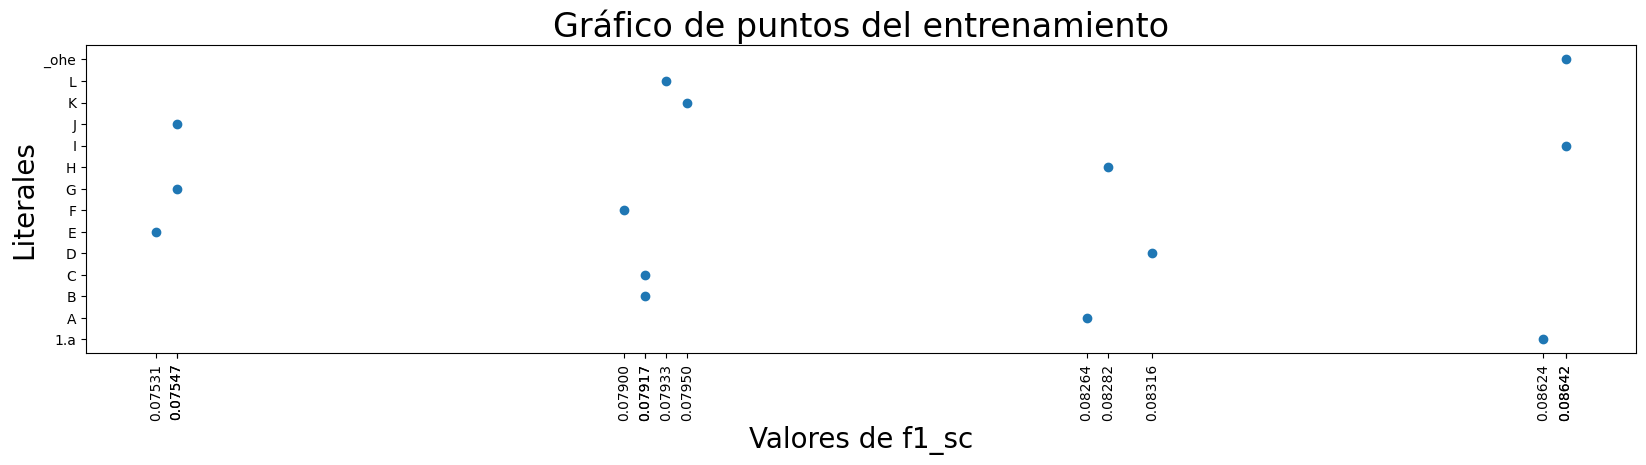

In [230]:
import matplotlib.pyplot as plt

# Definimos los datos de la lista f1_sc
x_vals = ['1.a','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L','_ohe']

# Creamos la figura con un tamaño de 20x10
plt.figure(figsize=(20, 4))

# Creamos el gráfico de puntos con los valores de los ejes invertidos
plt.scatter(f1_sc, x_vals)

# Configuramos los ejes y el título
plt.xlabel('Valores de f1_sc',fontsize=20)
plt.ylabel('Literales',fontsize=20)
plt.title('Gráfico de puntos del entrenamiento', fontsize=24)

# Configuramos las etiquetas del eje y
# Configuramos las etiquetas del eje y y rotamos las del eje x
plt.xticks(rotation=90)

plt.xticks(f1_sc)

# Mostramos el gráfico
plt.show()

Observamos con sorpresa que los diferentes métodos dan valores diferentes.
Como observacion adicional vemos que importa el orden en el que escribimos las variables (o bien el numero que asignamos a la variable categórica)